# Project: Analyzing Macbeth

## Introduction
For our first day and first data science project, we're going to do some rudimentry analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists, condtionals and dictionaries, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## Getting the Data
Here we start by importing a python package and using it to pull the transcript of Macbeth from the project Gutenberg website. We also preview a few details about what is now stored in the variable macbeth; it's a string with 119,846 characters, the first 500 of which are printed below. 

In [77]:
import requests
macbeth_full = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth_full))
print(len(macbeth_full))
print(macbeth_full[:30000])

<class 'str'>
119846
﻿***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************

This is our 3rd edition of most of these plays.  See the index.


Copyright laws are changing all over the world, be sure to check
the copyright laws for your country before posting these files!!

Please take a look at the important information in this header.
We encourage you to keep this file on your own disk, keeping an
electronic path open for the next readers.  Do not remove this.


**Welcome To The World of Free Plain Vanilla Electronic Texts**

**Etexts Readable By Both Humans and By Computers, Since 1971**

*These Etexts Prepared By Hundreds of Volunteers and Donations*

Information on contacting Project Gutenberg to get Etexts, and
further information is included below.  We need your donations.


The Tragedie of Macbeth

by William Shakespeare

July, 2000  [Etext #2264]


***The Project Gutenberg's Etext of Shakespeare's First

## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common python programming pattern to counting objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `dictionary.get()` method is very useful in doing this. Read the docstring for the dictionary.get() method and use it along with the pseudocode above to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into a variable 'Macbeth'. Be sure to include a title and appropriate labels for your graph.

In [56]:
def string_clean(string):
    punctuation = "!()-[]{};:'\,<>./?@$%^&*_~"
    
    #align capitalisation
    string = string.upper()
    
    #divide words into three categories, depending on whether they have leading or trailing punctuation
    no_punc_words = list(filter(lambda x: (x[0] not in punctuation) and (x[-1] not in punctuation),string.split()))
    start_punc_words = list(filter(lambda x: x[0] in punctuation,string.split()))
    end_punc_words = list(filter(lambda x: x[-1] in punctuation,string.split()))

    #remove punctuation
    start_punc_words = [x[1:] for x in start_punc_words]
    end_punc_words = [x[:-1] for x in end_punc_words]
    
    #merge the list of words, filtering out blanks caused by punctuation filters above
    return list(filter(None,(no_punc_words + start_punc_words + end_punc_words)))

In [72]:
#remove foreword, and create list of words without punctuation
macbeth = string_clean(macbeth_full[16241:])

#create a dictionary of unique words and thier count
word_count = {w:macbeth.count(w) for w in set(macbeth)}

#make list of 25 highest frequencies
top25_count = sorted(list(word_count.values()),reverse=True)[:25]

#create list of words that match the 25 highest frequencies
top25_words = []
for n in top25_count:                                       #consider each frequency in turn
    for w in list(word_count.keys()):                       #for each frequency, consider each word
        if word_count[w] == n and w not in top25_words:     #if that word appear with that frequency, and isn't already in the list...
            top25_words.append(w)                           #...then add that word to the list and move onto the next frequency
            break

25

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, '25 most common words in Macbeth')

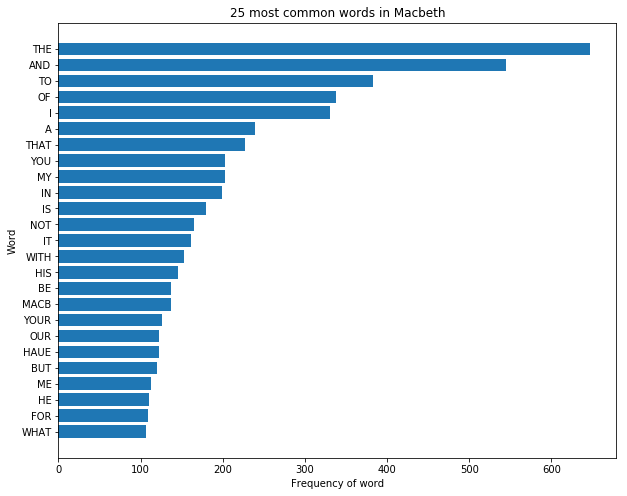

In [81]:
plt.figure(figsize=(10,8))
plt.barh(top25_words,top25_count)

plt.xlabel('Frequency of word')
plt.ylabel('Word')
plt.title('25 most common words in Macbeth')

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!